# Week 5 Seminar Answers

## Question 1

In [1]:
import pandas as pd
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-24,74.315002,76.044998,72.307503,74.544998,73.971603,222195200
1,2020-02-25,75.237503,75.632500,71.532501,72.019997,71.466019,230673600
2,2020-02-26,71.632500,74.470001,71.625000,73.162498,72.599739,198054800
3,2020-02-27,70.275002,71.500000,68.239998,68.379997,67.854019,320605600
4,2020-02-28,64.315002,69.602501,64.092499,68.339996,67.814331,426884800


In [2]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2021-02-17,131.250000,132.220001,129.470001,130.839996,130.839996,97918500
249,2021-02-18,129.199997,130.000000,127.410004,129.710007,129.710007,96648100
250,2021-02-19,130.240005,130.710007,128.800003,129.869995,129.869995,87525900
251,2021-02-22,128.009995,129.720001,125.599998,126.000000,126.000000,103607600
252,2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,157859100


## Question 2

In [3]:
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.03387224148704758,
 0.015863763168338943,
 -0.06536827907879952,
 -0.0005849027159317411,
 0.09310068988220192]

In [4]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.034459198325173857,
 0.015739248795493523,
 -0.06760270865279124,
 -0.0005850738382551144,
 0.08901832744196367]

In [5]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.64163032 and its annulized volatility is 0.46897489


In [6]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.53148891 and its annulized volatility is 0.46908039


## Question 3

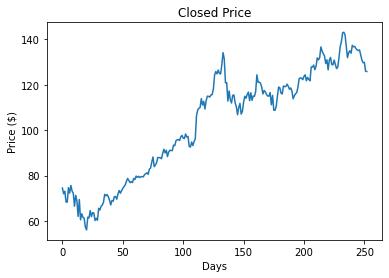

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

## Question 4

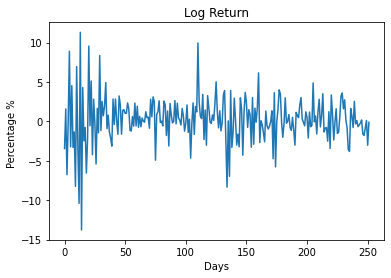

In [8]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

## Question 6


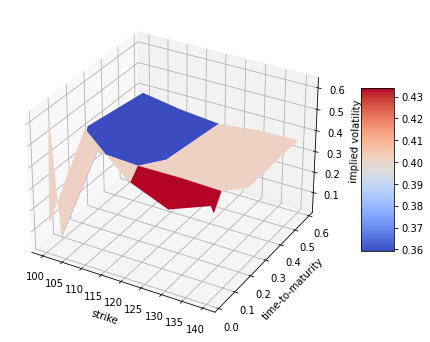

In [9]:
strike = np.array([100, 110, 120, 130, 140])
ttm = np.array([1/52, 2/52, 1/12, 3/12, 7/12])
strike, ttm = np.meshgrid(strike, ttm)
v1 = np.array([0.1278, 0.6235, 0.4468, 0.3682, 0.4411])
v2 = np.array([0.6343, 0.5303, 0.4198, 0.3692, 0.3945])
v3 = np.array([0.0148, 0.4783, 0.4674, 0.4693, 0.4638])
v4 = np.array([0.4370, 0.3415, 0.3847, 0.3691, 0.3631])
v5 = np.array([0.3910, 0.3596, 0.3407, 0.3611, 0.3658])
iv = np.array([v1, v2, v3, v4, v5])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5);

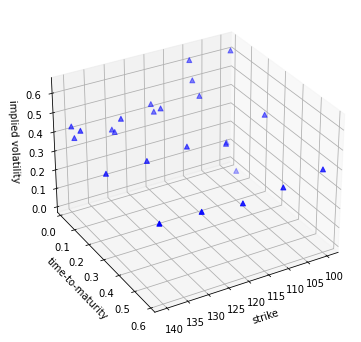

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir='z', s=25, c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility');